In [1]:
import numpy as np
from qiskit import*
import math as m
from scipy import linalg as la
import matplotlib.pyplot as plt
import pylatexenc
from qiskit.quantum_info import*
from qiskit.visualization import*
from itertools import*
%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)
np.seterr(divide = 'ignore') 
from numpy.linalg import eig
import matplotlib.pyplot as plt
import warnings

#suppress warnings
warnings.filterwarnings('ignore')


#we need this block to run the circuit
sim = Aer.get_backend('aer_simulator')
sigma = 1

In [2]:
#Listing out our parameters
c_1 = 1/(np.sqrt(2))
c_2 = c_1*1j
C2 = 1/(8*(np.pi**2)*sigma**4)
val1 = [1,-1]
q1 = [i for i in range(94)]
def LPI(lambda_phi):
    lambda_pi = np.pi/(np.multiply(4,lambda_phi))*(2*np.pi)**(3/2)*sigma**3
    return lambda_pi

alphasqrd = 1/(np.pi*2)
Smearing = 1/((2*np.pi)**(3/2)*sigma)
# def LPI(lambda_phi):
#     lambda_pi = 1/(np.multiply(1,lambda_phi))
#     return lambda_pi
NLIST = 83   
lambda_phi = [i for i in range(96)]
lambda_pi = [LPI(lambda_phi)]
lambda_phi_sqrd=[(lambda_phi[i])**2 for i in range(96)]
dephasegamma=[lambda_phi_sqrd[i]*(Smearing)for i in range(96)]
#Defining a Lambda that will be Dephased. 
def Dephased_Lambda(i,b):
    Dephased_Lambda = np.sqrt((i**2)/(1+4*alphasqrd*b**2*i**2*Smearing)+1/(2*Smearing*alphasqrd)*np.log(1+4*alphasqrd*b**2*i**2*Smearing))
    return Dephased_Lambda
def Dephased_LPI(i,b):
    Dephased_LPI = np.pi/(np.multiply(4,Dephased_Lambda(i,b)))*(2*np.pi)**(3/2)*sigma**3
    return Dephased_LPI

#Defining a Lambda that will be Dephased by a coherent state eigenstate operator \hat{\alpha}. 
def NO_Dephased_Lambda(i,b):
    Dephased_Lambda = np.sqrt(lambda_phi_sqrd[i]*(1+b**2))
    return Dephased_Lambda
def NO_Dephased_LPI(i,b):
    Dephased_LPI = np.pi/(np.multiply(4,NO_Dephased_Lambda(i,b)))*(2*np.pi)**(3/2)*sigma**3
    return Dephased_LPI

def C(lambda_pi,lambda_phi):
    C = -1j*np.multiply(lambda_phi,lambda_pi)/(2*np.sqrt((2*np.pi)**3)*sigma**3)
    return C
# def C(lambda_pi,lambda_phi):
#     C = 1
#     return C
def W(xl,xm,zl,zm,lambda_pi,lambda_phi):
    W_lm = C2*(4*np.multiply(xl,xm)*np.multiply(lambda_pi,lambda_pi)+2*np.multiply(zl,zm)*(sigma**2)*np.multiply(lambda_phi,lambda_phi)+1j*np.sqrt(2*np.pi)*sigma*np.multiply(lambda_pi,lambda_phi)*(np.multiply(xm,zl)-np.multiply(xl,zm)))
    return W_lm


In [3]:
# #This Block was used to see values before the longer calculations ahead
#  List_NO_Dephased_Lambda = [NO_Dephased_Lambda(i) for i in range(95)]
# List_NO_Dephased_LPI = [NO_Dephased_LPI(i) for i in range(95)]
# List_LPI = [LPI(i) for i in range(106)]
# print(List_NO_Dephased_Lambda)
# print(List_NO_Dephased_LPI)
# print(lambda_phi)
# print(List_LPI)

In [4]:
#this block is to Establish the specific projection matrices

def Projection_z(x):
    proj_z = [x,0] if x==1 else [0,-x]
    return proj_z

def Projection_y(x):
    proj_y = [c_1*x,c_2*x] if x==1 else [-c_1*x,c_2*x]
    return proj_y

def Projection_x(x):
    proj_x = [c_1*x,c_1*x] if x==1 else [-c_1*x,c_1*x]
    return proj_x


In [5]:
#Here we will define equation 70

def rho_CB(lpi,lphi):
    rho_CB = [1/2*np.kron((np.exp(x1*z1*C(lpi,lphi))*np.exp(-x2*z2*C(lpi,lphi))*np.exp(x3*z3*C(lpi,lphi))*np.exp(-x4*z4*C(lpi,lphi))\
           *np.exp(-1*(W(x1,x2,z1,z2,lpi,lphi)+W(x1,x3,z1,z3,lpi,lphi)+W(x1,x4,z1,z4,lpi,lphi)+W(x2,x3,z2,z3,lpi,lphi)+W(x2,x4,z2,z4,lpi,lphi)+W(x3,x4,z3,z4,lpi,lphi)))\
                               *np.exp(-1/2*(W(x1,x1,z1,z1,lpi,lphi)+W(x2,x2,z2,z2,lpi,lphi)+W(x3,x3,z3,z3,lpi,lphi)+W(x4,x4,z4,z4,lpi,lphi))))\
                                   ,(np.kron((np.conj(Projection_z(k1)).T @ np.outer(Projection_z(-z1),Projection_z(-z1)) @ np.outer(Projection_x(-x1),Projection_x(-x1))@np.outer(Projection_x(x4),Projection_x(x4))@ np.outer(Projection_z(z4),Projection_z(z4)) @ Projection_z(j1))\
                                    ,np.kron(np.outer(Projection_z(-j1),Projection_z(-k1)),(np.outer((np.outer(Projection_z(-z3),Projection_z(-z3))@ np.outer(Projection_x(-x3),Projection_x(-x3)) @ Projection_y(1)), np.conj(Projection_y(1)).T @ np.outer(Projection_x(x2),Projection_x(x2)) @ np.outer(Projection_z(z2),Projection_z(z2))))))))\
                                   for x1 in val1 for z1 in val1 for x2 in val1 for z2 in val1 for x3 in val1 for z3 in val1 for x4 in val1 for z4 in val1 for j1 in val1 for k1 in val1]
    return rho_CB

def rho_B(lpi,lphi):
    rho_B = [1/2*np.kron((np.exp(x1*z1*C(lpi,lphi))*np.exp(-x2*z2*C(lpi,lphi))*np.exp(x3*z3*C(lpi,lphi))*np.exp(-x4*z4*C(lpi,lphi))\
           *np.exp(-1*(W(x1,x2,z1,z2,lpi,lphi)+W(x1,x3,z1,z3,lpi,lphi)+W(x1,x4,z1,z4,lpi,lphi)+W(x2,x3,z2,z3,lpi,lphi)+W(x2,x4,z2,z4,lpi,lphi)+W(x3,x4,z3,z4,lpi,lphi)))\
                               *np.exp(-1/2*(W(x1,x1,z1,z1,lpi,lphi)+W(x2,x2,z2,z2,lpi,lphi)+W(x3,x3,z3,z3,lpi,lphi)+W(x4,x4,z4,z4,lpi,lphi))))\
                                   ,(np.kron((np.conj(Projection_z(j1)).T @ np.outer(Projection_z(-z1),Projection_z(-z1)) @ np.outer(Projection_x(-x1),Projection_x(-x1))@np.outer(Projection_x(x4),Projection_x(x4))@ np.outer(Projection_z(z4),Projection_z(z4)) @ Projection_z(j1))\
                                    ,np.outer(np.outer(Projection_z(-z3),Projection_z(-z3))@ np.outer(Projection_x(-x3),Projection_x(-x3)) @ Projection_z(1), np.conj(Projection_z(1)).T @ np.outer(Projection_x(x2),Projection_x(x2)) @ np.outer(Projection_z(z2),Projection_z(z2))))))\
                                      for x1 in val1 for z1 in val1 for x2 in val1 for z2 in val1 for x3 in val1 for z3 in val1 for x4 in val1 for z4 in val1 for j1 in val1]
    return rho_B    

In [17]:
#This block calculates all of the density matrices from 1-105

rho_CB_List_wo0 = [rho_CB(LPI(i),i) for i in range (1,85)]
rho_B_List_wo0 = [rho_B(LPI(i),i) for i in range (1,85)]

#These next lines generate the density matrix elements associated with the dephasing channel that is due to non-unitary interactions. 
# NO1_Dephased_rho_CB_List = [rho_CB(NO_Dephased_LPI(i,1/2),NO_Dephased_Lambda(i,1/2)) for i in range (1,85)]
# NO1_Dephased_rho_B_List = [rho_B(NO_Dephased_LPI(i,1/2),NO_Dephased_Lambda(i,1/2)) for i in range (1,85)]
# NO1_2_Dephased_rho_CB_List = [rho_CB(NO_Dephased_LPI(i,1),NO_Dephased_Lambda(i,1)) for i in range (1,85)]
# NO1_2_Dephased_rho_B_List = [rho_B(NO_Dephased_LPI(i,1),NO_Dephased_Lambda(i,1)) for i in range (1,85)]
# NO1_3_Dephased_rho_CB_List = [rho_CB(NO_Dephased_LPI(i,3/2),NO_Dephased_Lambda(i,3/2)) for i in range (1,85)]
# NO1_3_Dephased_rho_B_List = [rho_B(NO_Dephased_LPI(i,3/2),NO_Dephased_Lambda(i,3/2)) for i in range (1,85)]

# These lines generate the density matrix elements associated with the Noisy Channel from an extra UDW detector
Noisy1Dephased_rho_CB_List = [rho_CB(Dephased_LPI(i,1),Dephased_Lambda(i,1)) for i in range (1,85)]
Noisy1Dephased_rho_B_List = [rho_B(Dephased_LPI(i,1),Dephased_Lambda(i,1)) for i in range (1,85)]
Noisy12Dephased_rho_CB_List = [rho_CB(Dephased_LPI(i,1/3),Dephased_Lambda(i,1/3)) for i in range (1,85)]
Noisy12Dephased_rho_B_List = [rho_B(Dephased_LPI(i,1/3),Dephased_Lambda(i,1/3)) for i in range (1,85)]
Noisy13Dephased_rho_CB_List = [rho_CB(Dephased_LPI(i,1/5),Dephased_Lambda(i,1/5)) for i in range (1,85)]
Noisy13Dephased_rho_B_List = [rho_B(Dephased_LPI(i,1/5),Dephased_Lambda(i,1/5)) for i in range (1,85)]
# Noisy14Dephased_rho_CB_List_wo0 = [rho_CB(Dephased_LPI(i,10),Dephased_Lambda(i,10)) for i in range (1,85)]
# Noisy14Dephased_rho_B_List_wo0 = [rho_B(Dephased_LPI(i,10),Dephased_Lambda(i,10)) for i in range (1,85)]
# Noisy15Dephased_rho_CB_List_wo0 = [rho_CB(Dephased_LPI(i,30),Dephased_Lambda(i,30)) for i in range (1,85)]
# Noisy15Dephased_rho_B_List_wo0 = [rho_B(Dephased_LPI(i,30),Dephased_Lambda(i,30)) for i in range (1,85)]




In [ ]:
# #manually adding lambda ~0 
rho_CB_List_append = [sum(rho_CB(LPI(0.15),0.15))]
rho_CB_List_wo0_sum = [sum(rho_CB_List_wo0[i]) for i in range(84)]
rho_CB_List = np.insert(rho_CB_List_append,0,rho_CB_List_wo0_sum,axis=0)

rho_B_List_append = [sum(rho_B(LPI(0.15),0.15))]
rho_B_List_wo0_sum = [sum(rho_B_List_wo0[i]) for i in range(84)]
rho_B_List = np.insert(rho_B_List_append,0,rho_B_List_wo0_sum,axis=0)

# Noisy1Dephased_rho_CB_List_append = [sum(rho_CB(Dephased_LPI(0.1,10),Dephased_Lambda(0.1,10)))]
# Noisy1Dephased_rho_CB_List_wo0_sum = [sum(Noisy1Dephased_rho_CB_List_wo0[i]) for i in range(84)]
# Noisy1Dephased_rho_CB_List = np.insert(Noisy1Dephased_rho_CB_List_append,0,Noisy1Dephased_rho_CB_List_wo0_sum,axis=0)

# Noisy1Dephased_rho_B_List_append = [sum(rho_B(Dephased_LPI(0.1,10),Dephased_Lambda(0.1,10)))]
# Noisy1Dephased_rho_B_List_wo0_sum = [sum(Noisy1Dephased_rho_B_List_wo0[i]) for i in range(84)]
# Noisy1Dephased_rho_B_List = np.insert(Noisy1Dephased_rho_B_List_append,0,Noisy1Dephased_rho_B_List_wo0_sum,axis=0)


# Noisy12Dephased_rho_CB_List_append = [sum(rho_CB(Dephased_LPI(0.1,10),Dephased_Lambda(0.1,10)))]
# Noisy12Dephased_rho_CB_List_wo0_sum = [sum(Noisy12Dephased_rho_CB_List[i]) for i in range(84)]
# Noisy12Dephased_rho_CB_List = np.insert(Noisy12Dephased_rho_CB_List_append,0,Noisy12Dephased_rho_CB_List_wo0_sum,axis=0)

# Noisy12Dephased_rho_B_List_append = [sum(rho_B(Dephased_LPI(0.1,10),Dephased_Lambda(0.1,10)))]
# Noisy12Dephased_rho_B_List_wo0_sum = [sum(Noisy12Dephased_rho_B_List[i]) for i in range(84)]
# Noisy12Dephased_rho_B_List = np.insert(Noisy12Dephased_rho_B_List_append,0,Noisy12Dephased_rho_B_List_wo0_sum,axis=0)

# Noisy13Dephased_rho_CB_List_append = [sum(rho_CB(Dephased_LPI(0.1,10),Dephased_Lambda(0.1,10)))]
# Noisy13Dephased_rho_CB_List_wo0_sum = [sum(Noisy13Dephased_rho_CB_List[i]) for i in range(84)]
# Noisy13Dephased_rho_CB_List = np.insert(Noisy13Dephased_rho_CB_List_append,0,Noisy13Dephased_rho_CB_List_wo0_sum,axis=0)

# Noisy13Dephased_rho_B_List_append = [sum(rho_B(Dephased_LPI(0.1,10),Dephased_Lambda(0.1,10)))]
# Noisy13Dephased_rho_B_List_wo0_sum = [sum(Noisy13Dephased_rho_B_List[i]) for i in range(84)]
# Noisy13Dephased_rho_B_List = np.insert(Noisy13Dephased_rho_B_List_append,0,Noisy13Dephased_rho_B_List_wo0_sum,axis=0)


# Noisy14Dephased_rho_CB_List_append = [sum(rho_CB(Dephased_LPI(0.1,10),Dephased_Lambda(0.1,10)))]
# Noisy14Dephased_rho_CB_List_wo0_sum = [sum(Noisy14Dephased_rho_CB_List_wo0[i]) for i in range(84)]
# Noisy14Dephased_rho_CB_List = np.insert(Noisy14Dephased_rho_CB_List_append,0,Noisy14Dephased_rho_CB_List_wo0_sum,axis=0)

# Noisy14Dephased_rho_B_List_append = [sum(rho_B(Dephased_LPI(0.1,10),Dephased_Lambda(0.1,10)))]
# Noisy14Dephased_rho_B_List_wo0_sum = [sum(Noisy14Dephased_rho_B_List_wo0[i]) for i in range(84)]
# Noisy14Dephased_rho_B_List = np.insert(Noisy14Dephased_rho_B_List_append,0,Noisy14Dephased_rho_B_List_wo0_sum,axis=0)

# Noisy15Dephased_rho_CB_List_append = [sum(rho_CB(Dephased_LPI(0.1,30),Dephased_Lambda(0.1,30)))]
# Noisy15Dephased_rho_CB_List_wo0_sum = [sum(Noisy15Dephased_rho_CB_List_wo0[i]) for i in range(84)]
# Noisy15Dephased_rho_CB_List = np.insert(Noisy15Dephased_rho_CB_List_append,0,Noisy15Dephased_rho_CB_List_wo0_sum,axis=0)

# Noisy15Dephased_rho_B_List_append = [sum(rho_B(Dephased_LPI(0.1,30),Dephased_Lambda(0.1,30)))]
# Noisy15Dephased_rho_B_List_wo0_sum = [sum(Noisy15Dephased_rho_B_List_wo0[i]) for i in range(84)]
# Noisy15Dephased_rho_B_List = np.insert(Noisy15Dephased_rho_B_List_append,0,Noisy15Dephased_rho_B_List_wo0_sum,axis=0)


# print(Noisy15Dephased_rho_CB_List[0])


In [20]:

Density_List_CB = [DensityMatrix(rho_CB_List[i]) for i in range(NLIST)]
Density_List_B = [DensityMatrix((rho_B_List[i])) for i in range(NLIST)]

display(Density_List_CB[0].draw('latex', prefix=" \\rho_{CB} = "))
#         Density_List_B[0].draw('latex', prefix=" \\rho_{B} = "),
#         Density_List_CB[1].draw('latex', prefix=" \\rho_{CB} = "),
#         Density_List_B[1].draw('latex', prefix=" \\rho_{B} = "),
#         Density_List_CB[2].draw('latex', prefix=" \\rho_{CB} = "),
#         Density_List_B[2].draw('latex', prefix=" \\rho_{B} = "),
#         Density_List_CB[3].draw('latex', prefix=" \\rho_{CB} = "),
#         Density_List_B[3].draw('latex', prefix=" \\rho_{B} = "),
#         Density_List_CB[4].draw('latex', prefix=" \\rho_{CB} = "),
#         Density_List_B[4].draw('latex', prefix=" \\rho_{B} = "),
#         Density_List_CB[100].draw('latex', prefix=" \\rho_{CB} = "),
#         Density_List_B[100].draw('latex', prefix=" \\rho_{B} = "),
#         Density_List_CB[101].draw('latex', prefix=" \\rho_{CB} = "),
#         Density_List_B[101].draw('latex', prefix=" \\rho_{B} = "))


# NO1_Dephased_Density_List_CB = [DensityMatrix(sum(NO1_Dephased_rho_CB_List[i])) for i in range(NLIST)]
# NO1_Dephased_Density_List_B = [DensityMatrix(sum(NO1_Dephased_rho_B_List[i])) for i in range(NLIST)]
# NO12_Dephased_Density_List_CB = [DensityMatrix(sum(NO1_2_Dephased_rho_CB_List[i])) for i in range(NLIST)]
# NO12_Dephased_Density_List_B = [DensityMatrix(sum(NO1_2_Dephased_rho_B_List[i])) for i in range(NLIST)]
# NO13_Dephased_Density_List_CB = [DensityMatrix(sum(NO1_3_Dephased_rho_CB_List[i])) for i in range(NLIST)]
# NO13_Dephased_Density_List_B = [DensityMatrix(sum(NO1_3_Dephased_rho_B_List[i])) for i in range(NLIST)]

Noisy1Dephased_Density_List_CB = [DensityMatrix(sum(Noisy1Dephased_rho_CB_List[i])) for i in range(NLIST)]
Noisy1Dephased_Density_List_B = [DensityMatrix(sum(Noisy1Dephased_rho_B_List[i])) for i in range(NLIST)]
Noisy12Dephased_Density_List_CB = [DensityMatrix(sum(Noisy12Dephased_rho_CB_List[i])) for i in range(NLIST)]
Noisy12Dephased_Density_List_B = [DensityMatrix(sum(Noisy12Dephased_rho_B_List[i])) for i in range(NLIST)]
Noisy13Dephased_Density_List_CB = [DensityMatrix(sum(Noisy13Dephased_rho_CB_List[i])) for i in range(NLIST)]
Noisy13Dephased_Density_List_B = [DensityMatrix(sum(Noisy13Dephased_rho_B_List[i])) for i in range(NLIST)]
# Noisy14Dephased_Density_List_CB = [DensityMatrix((Noisy14Dephased_rho_CB_List[i])) for i in range(NLIST)]
# Noisy14Dephased_Density_List_B = [DensityMatrix((Noisy14Dephased_rho_B_List[i])) for i in range(NLIST)]
# Noisy15Dephased_Density_List_CB = [DensityMatrix((Noisy15Dephased_rho_CB_List[i])) for i in range(NLIST)]
# Noisy15Dephased_Density_List_B = [DensityMatrix((Noisy15Dephased_rho_B_List[i])) for i in range(NLIST)]


# display(Noisy14Dephased_Density_List_CB[40].draw('latex', prefix=" \\rho_{CB} = "),
#         Noisy14Dephased_Density_List_B[40].draw('latex', prefix=" \\rho_{B} = "))
#         Dephased_Density_List_CB[1].draw('latex', prefix=" \\rho_{CB} = "),
#         Dephased_Density_List_B[1].draw('latex', prefix=" \\rho_{B} = "),
#         Dephased_Density_List_CB[2].draw('latex', prefix=" \\rho_{CB} = "),
#         Dephased_Density_List_B[2].draw('latex', prefix=" \\rho_{B} = "),
#         Dephased_Density_List_CB[3].draw('latex', prefix=" \\rho_{CB} = "),
#         Dephased_Density_List_B[3].draw('latex', prefix=" \\rho_{B} = "),
#         Dephased_Density_List_CB[4].draw('latex', prefix=" \\rho_{CB} = "),
#         Dephased_Density_List_B[4].draw('latex', prefix=" \\rho_{B} = "),
#         Dephased_Density_List_CB[100].draw('latex', prefix=" \\rho_{CB} = "),
#         Dephased_Density_List_B[100].draw('latex', prefix=" \\rho_{B} = "),
        # Dephased_Density_List_CB[45].draw('latex', prefix=" \\rho_{CB} = "),
        # Dephased_Density_List_B[45].draw('latex', prefix=" \\rho_{B} = "))

                                   

<IPython.core.display.Latex object>

In [21]:
#Define Coherent Information and generate the list
# CI = [NV_Entropy(Sum_List_B[i])-NV_Entropy(Sum_List_CB[i]) for i in range(100)]
q2 = 50
q1 = [i for i in range(q2)]
q3 = [i for i in range(q2)]
Coherent_Information = [entropy(Density_List_B[i])-entropy(Density_List_CB[i]) for i in range(q2)]
# NO1_Dephased_Coherent_Information = [entropy(NO1_Dephased_Density_List_B[i])-entropy(NO1_Dephased_Density_List_CB[i]) for i in range(q2)]
# NO12_Dephased_Coherent_Information = [entropy(NO12_Dephased_Density_List_B[i])-entropy(NO12_Dephased_Density_List_CB[i]) for i in range(q2)]
# NO13_Dephased_Coherent_Information = [entropy(NO13_Dephased_Density_List_B[i])-entropy(NO13_Dephased_Density_List_CB[i]) for i in range(q2)]
Noisy1Dephased_Coherent_Information = [entropy(Noisy1Dephased_Density_List_B[i])-entropy(Noisy1Dephased_Density_List_CB[i]) for i in range(q2)]
Noisy12Dephased_Coherent_Information = [entropy(Noisy12Dephased_Density_List_B[i])-entropy(Noisy12Dephased_Density_List_CB[i]) for i in range(q2)]
Noisy13Dephased_Coherent_Information = [entropy(Noisy13Dephased_Density_List_B[i])-entropy(Noisy13Dephased_Density_List_CB[i]) for i in range(q2)]
# Noisy14Dephased_Coherent_Information = [entropy(Noisy14Dephased_Density_List_B[i])-entropy(Noisy14Dephased_Density_List_CB[i]) for i in range(q2)]
# Noisy15Dephased_Coherent_Information = [entropy(Noisy15Dephased_Density_List_B[i])-entropy(Noisy15Dephased_Density_List_CB[i]) for i in range(q2)]
Coherent_Information_Zero = [0 if Coherent_Information[i]<0 else Coherent_Information[i] for i in range(q2)]
Noisy1Dephased_Coherent_Information_Zero = [0 if Noisy1Dephased_Coherent_Information[i]<0 else Noisy1Dephased_Coherent_Information[i] for i in range(q2)]
Noisy12Dephased_Coherent_Information_Zero = [0 if Noisy12Dephased_Coherent_Information[i]<0 else Noisy12Dephased_Coherent_Information[i] for i in range(q2)]
Noisy13Dephased_Coherent_Information_Zero = [0 if Noisy13Dephased_Coherent_Information[i]<0 else Noisy13Dephased_Coherent_Information[i] for i in range(q2)]
# Noisy14Dephased_Coherent_Information_Zero = [0 if Noisy14Dephased_Coherent_Information[i]<0 else Noisy14Dephased_Coherent_Information[i] for i in range(q2)]
# Noisy15Dephased_Coherent_Information_Zero = [0 if Noisy15Dephased_Coherent_Information[i]<0 else Noisy15Dephased_Coherent_Information[i] for i in range(q2)]
# NO1_Dephased_Coherent_Information_Zero = [0 if NO1_Dephased_Coherent_Information[i]<0 else NO1_Dephased_Coherent_Information[i] for i in range(q2)]
# NO12_Dephased_Coherent_Information_Zero = [0 if NO12_Dephased_Coherent_Information[i]<0 else NO12_Dephased_Coherent_Information[i] for i in range(q2)]
# NO13_Dephased_Coherent_Information_Zero = [0 if NO13_Dephased_Coherent_Information[i]<0 else NO13_Dephased_Coherent_Information[i] for i in range(q2)]

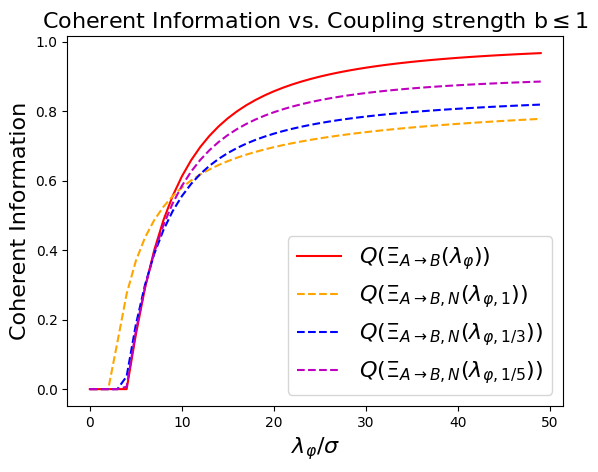

In [23]:
# plotting the points 
plt.plot(q3,Coherent_Information_Zero, 'r-', label=r"$Q(\Xi_{A\rightarrow B}(\lambda_{\varphi})$)")
# plt.plot(q1,NO1_Dephased_Coherent_Information_Zero , color='orange', linestyle='dashed', label=r"$Q(\Xi_{A\rightarrow B,E}(\lambda_{\varphi},\frac{1}{2}))$")
# plt.plot(q1,NO12_Dephased_Coherent_Information_Zero , color='blue', linestyle='dashed', label=r"$Q(\Xi_{A\rightarrow B,E}(\lambda_{\varphi},1))$")
# plt.plot(q1,NO13_Dephased_Coherent_Information_Zero , 'm', linestyle='dashed', label=r"$Q(\Xi_{A\rightarrow B,E}(\lambda_{\varphi},\frac{3}{2}))$")
plt.plot(q1,Noisy1Dephased_Coherent_Information_Zero, color='orange', linestyle='dashed', label=r"$Q(\Xi_{A\rightarrow B,N}(\lambda_{\varphi,1}))$")
plt.plot(q1,Noisy12Dephased_Coherent_Information_Zero,'b--', label=r"$Q(\Xi_{A\rightarrow B,N}(\lambda_{\varphi,1/3}))$")
plt.plot(q1,Noisy13Dephased_Coherent_Information_Zero,'m--', label=r"$Q(\Xi_{A\rightarrow B,N}(\lambda_{\varphi,1/5}))$")
# plt.plot(q1,Noisy14Dephased_Coherent_Information_Zero,color='b', linestyle='dashed', label=r"$Q(\Xi_{A\rightarrow B,N}(\lambda_{\varphi,10}))$")
# plt.plot(q1,Noisy15Dephased_Coherent_Information_Zero,color='m', linestyle='dashed', label=r"$Q(\Xi_{A\rightarrow B,N}(\lambda_{\varphi,30}))$")  
# # naming the x axis
plt.xlabel(r"$\lambda_{\varphi}/\sigma$",fontsize="16")
# naming the y axis
plt.ylabel('Coherent Information',fontsize="16")
  
# giving a title to my graph
plt.title('Coherent Information vs. Coupling strength $\mathrm{b}\leq1$',fontsize="16")
#add a legend
plt.legend( fontsize="16")
  
# function to show the plot
plt.savefig('UDW_Channel_Capacity.pdf')
